In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('datasets/data_science_job.csv')

print('Rows:', df.shape[0], 'Columns:', df.shape[1])
df.sample(3)

Rows: 19158 Columns: 13


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
12814,8718,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,15.0,1000-4999,Pvt Ltd,53.0,0.0
6882,9783,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,1000-4999,Pvt Ltd,NaN,0.0
3246,3634,city_83,0.923,Male,Has relevent experience,Full time course,High School,NaN,9.0,NaN,NaN,NaN,0.0


In [5]:
# check the % of data missing in each column
df.isnull().mean()*100 

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

## **Select Only those cols with less than 5% Missing Values**

In [9]:
colns = [coln for coln in df.columns if df[coln].isnull().mean() < 0.05 and df[coln].isnull().mean() > 0.0]
colns

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [11]:
# will be working on these colns 
df[colns].sample(3)

,city_development_index,enrolled_university,education_level,experience,training_hours
12299,0.920,no_enrollment,Graduate,7.0,42.0
1395,0.624,no_enrollment,Masters,9.0,100.0
13418,0.920,Full time course,High School,6.0,47.0


In [12]:
# check the % of data will be left after removing observations with missing variables
len(df[colns].dropna()) / len(df) 

0.8968577095730244

In [13]:
new_df = df[colns].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

## **Check whether distribution is still same after CCA**

<Axes: >

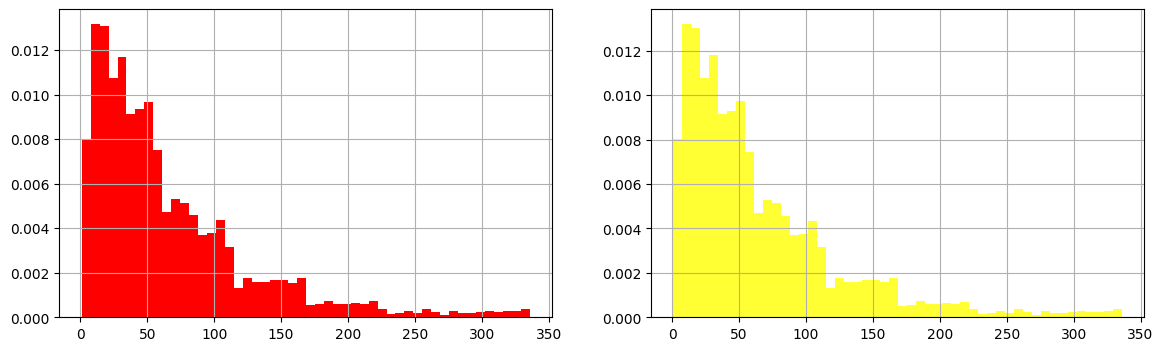

In [18]:
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(121)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after CCA, the argument alpha makes the color transparent, so we can
# see the overlay of 2 distributions
ax2 = fig.add_subplot(122)
new_df['training_hours'].hist(bins=50, ax=ax2, color='yellow', density=True, alpha=0.8)

<Axes: >

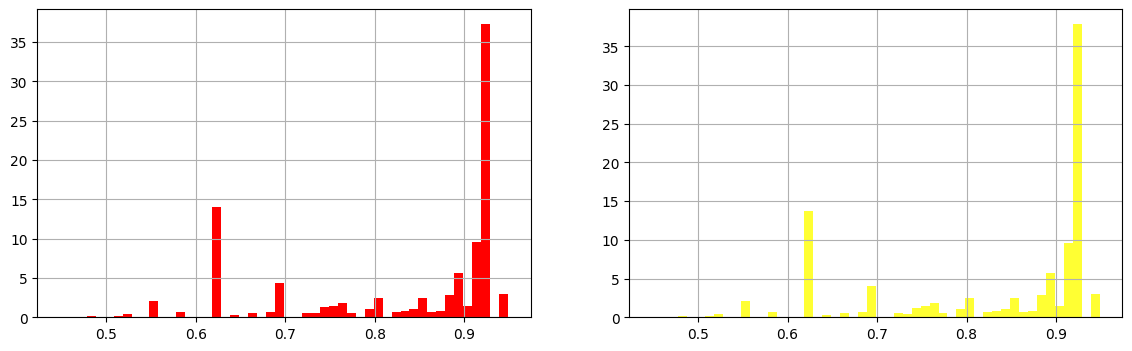

In [20]:
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(121)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after CCA, the argument alpha makes the color transparent, so we can
# see the overlay of 2 distributions
ax2 = fig.add_subplot(122)
new_df['city_development_index'].hist(bins=50, ax=ax2, color='yellow', density=True, alpha=0.8)

<Axes: >

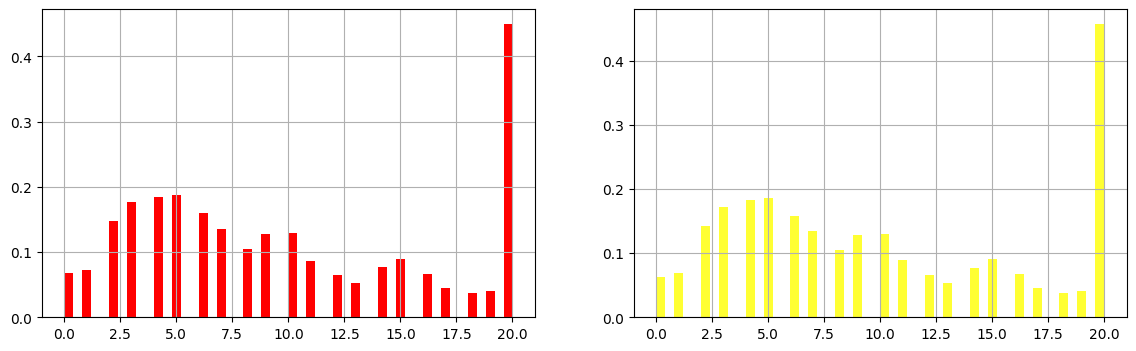

In [21]:
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(121)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after CCA, the argument alpha makes the color transparent, so we can
# see the overlay of 2 distributions
ax2 = fig.add_subplot(122)
new_df['experience'].hist(bins=50, ax=ax2, color='yellow', density=True, alpha=0.8)

In [22]:
temp = pd.concat([
        # percentage of observations per category, original data
        df['enrolled_university'].value_counts() / len(df),

        # percentge of observations per category, CCA data
        new_df['enrolled_university'].value_counts() / len(new_df)
    ], axis=1)

temp.columns = ['Original', 'CCA']

# display the difference 
temp

,Original,CCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [23]:
temp = pd.concat([
        # percentage of observations per category, original data
        df['education_level'].value_counts() / len(df),

        # percentge of observations per category, CCA data
        new_df['education_level'].value_counts() / len(new_df)
    ], axis=1)

temp.columns = ['Original', 'CCA']

# display the difference 
temp

,Original,CCA
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


### **Data after CCA is still distributed identically**